# Automatic Segmentation Code:
**Introduction:**
* A model that allows the computer to detect different objects in an image.
* "Segmentation masks [...] are like drawing a detailed outline around the object, following its exact shape. This allows for a more precise understanding of the object's shape, size, and position."
* "Automatic Segmentation refers to the process of using computational techniques to separate and identify specific regions or objects of interest within an image or scene"

* Being able to quickly segment an image can play an important role in medical imaging to detect tumors and organs, self-driving cars, and other fields of science, technology, and business.

---

**What this code does:**
  *  input an image

  *  press each play button (executes the code in that box)
  *  see the output image
---
  **Notes before starting:**
  * Edit --> Notebook Settings --> Python 3 and T4 GPU


  https://www.sciencedirect.com/topics/computer-science/automatic-segmentation#:~:text=Automatic%20Segmentation%20refers%20to%20the,Expert%20Systems%20with%20Applications%2C%202023
  
Piotr Skalski. (Jan 22, 2024). How to Use the Segment Anything Model (SAM). Roboflow Blog: https://blog.roboflow.com/how-to-use-segment-anything-model-sam/

In [ ]:
# create a home for storing models
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
# install segment anything
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.7 MB/s eta 0:00:00


In [ ]:
# download SAM weights
!mkdir -p {HOME}/weights #makes a folder called weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights # downloads the SAM models mask weights into the home/weights location

In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth") #creates a path where the weights are located
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH)) # check the path and that it was properly made

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
!mkdir -p {HOME}/data # make a directory in the home called data that you will upload the image you want to segment

In [ ]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h" # model type mostly for speed reasons

In [ ]:
# load segment model
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
# run automatic mask segmentation
mask_generator = SamAutomaticMaskGenerator(sam)

ADD COMMENT

In [ ]:
# name of your image you want to segment
# make sure the name is EXACTLY correct (dashes, capital vs lowercase, jpg vs JPG, etc)
IMAGE_NAME = "ioLight_B2_Buccal (8).jpg"

# shows location of the image (the image path)
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)


In [ ]:
# run the masks with SAM
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# IF THIS IS CRASHING MAKE SURE YOU ARE USING GPU NOT CPU
sam_result = mask_generator.generate(image_rgb)

In [ ]:
# optional : checking image size (height in pixels, width in pixels, 3 color channels)
print(image_rgb.shape)

(1944, 2592, 3)


In [ ]:
# optional : see the overall properties of ALL the masks
print(sam_result)

In [ ]:
#get the total number of masks
import numpy as np
total_masks = len(sam_result)

print(f"There are a total of {total_masks} masks for the image")

There are a total of 26 masks for the image


In [ ]:
total_areas = [] #initialize the array
for mask in sam_result:
  #check if the mask is a bubble
  if mask["area"] > 350:
    #add non-bubble masks to the array
    total_areas.append(mask["area"])

#remove the background element
del total_areas[0]

#convert to a numpy array
total_areas = np.array(total_areas)
#sort the array from least to greatest (just easier to look at)
total_areas.sort()

In [ ]:
#print out each element of the array
for area in total_areas:
  print(area)

904
2849
5138
5205
5258
5804
6205
6264
7748
8866
9195
9737
10391
10493
10806
10942
10955
11002
13059
14412
15007
15772
15975
23101
23509


In [ ]:
#find images average area in pixels
mean_area = np.mean(total_areas)

print(f"The mean area in pixels is {mean_area:.2f}")

The mean area in pixels is 11286.739130434782


In [ ]:
# how many of each type
buccalCount = 0
touchCount = 0
salivaCount = 0

for area in total_areas:
  if area >= 10000:
    buccalCount +=1
  elif area <2500:
    touchCount +=1
  elif area >=2500 and area < 10000:
    salivaCount +=1

print(f"There are {buccalCount} buccal cells, {touchCount} touch cells, and {salivaCount} saliva cells")

In [ ]:
# trying to sort cell types

if mean_area >= 10000:
  print("buccal cells")
elif mean_area <2500:
  print("touch cells")
elif mean_area >=2500 and mean_area < 10000:
  print("saliva cells")

buccal cells


In [ ]:
# visualize the segmentation
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)


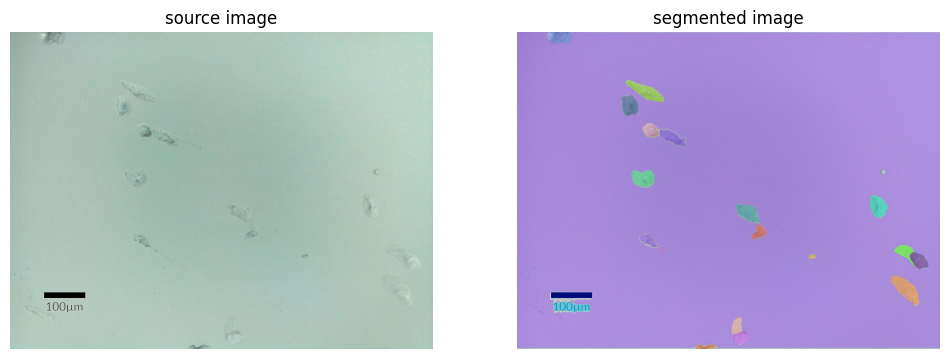

In [ ]:
# plot out the annotated vs original images
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)


Save annotated segmenation photo (png) and masks areas (txt)

In [ ]:
# create a txt file export of the areas

with open("mask_areas.txt", "w") as file:
    for value in total_areas:
          file.write(f"{value}\n")

In [ ]:
# save segmented photo
cv2.imwrite('IMAGE NAME.png', annotated_image)

from google.colab import files

# This will prompt the user to download the file to their local machine
files.download('IMAGE NAME.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>